# **1. Perkenalan Dataset**


Dataset yang saya gunakan yaitu Weather Data Classification. Dataset ini terdiri dari 10 fitur (7 fitur numerik dan 3 fitur kategorikal)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install kmodes
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv('weather_classification_data.csv', sep=';')

# **4. Exploratory Data Analysis (EDA)**

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [6]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
dtype: int64


Selanjutnya lakukan statistik deskriptif untuk data kategorikal dan numerik

Statistik Deskriptif:

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000

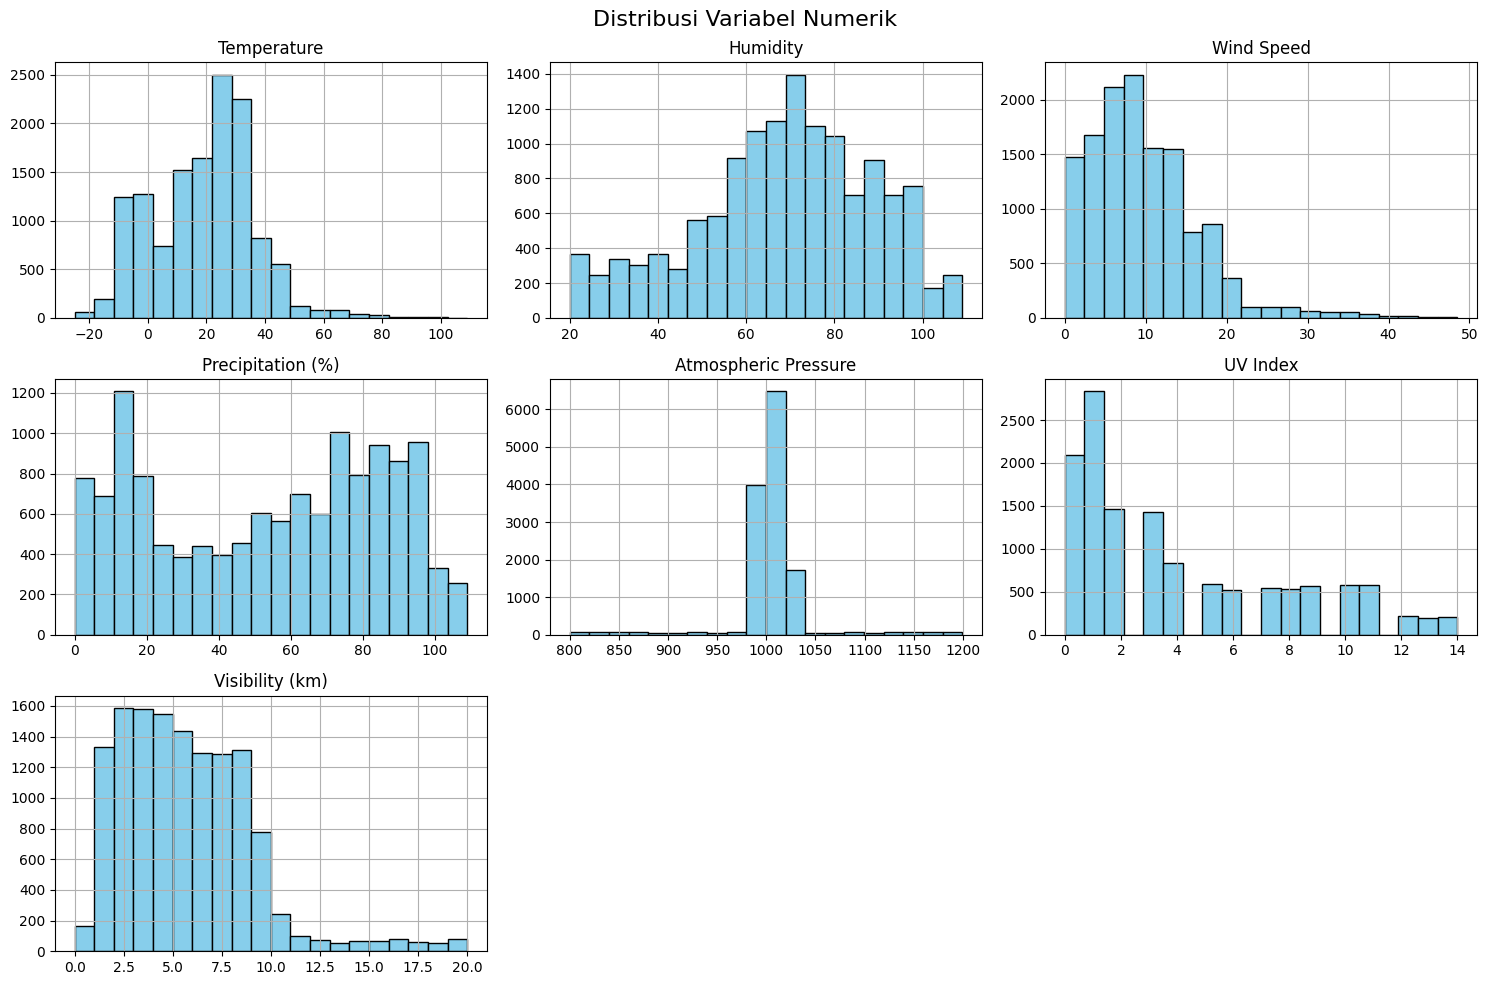

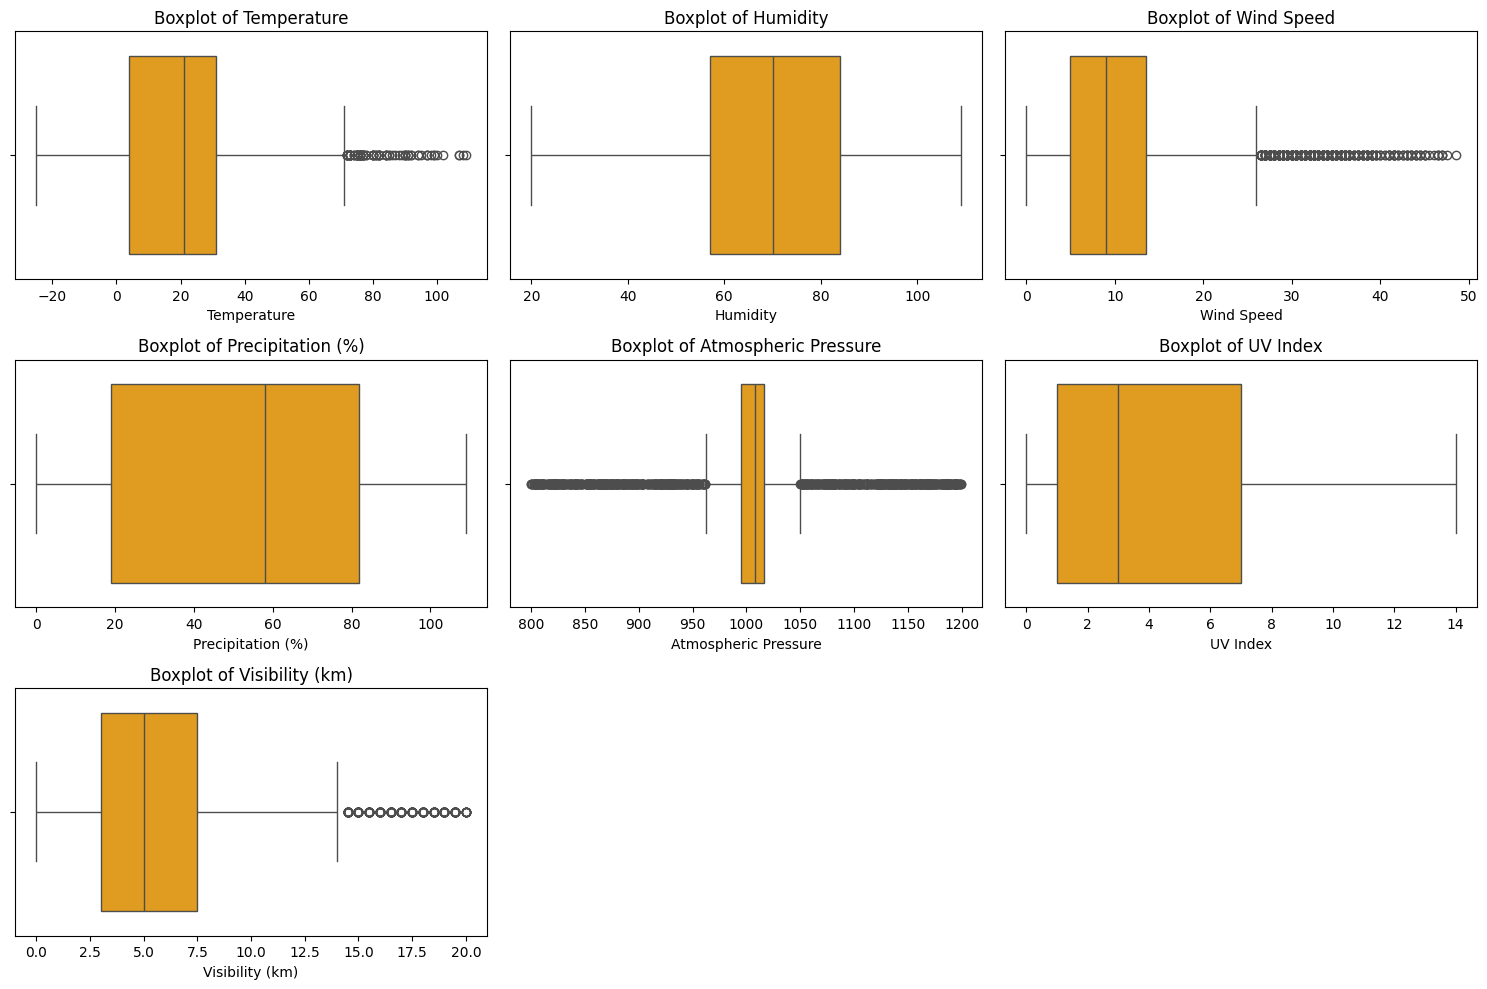

In [7]:
# Statistik deskriptif
print("Statistik Deskriptif:\n")
print(df.describe())

# Menampilkan histogram untuk semua variabel numerik
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.tight_layout()
plt.show()

# Menampilkan boxplot untuk semua variabel numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Menghubungkan antar variabel dengan matrix korelasi

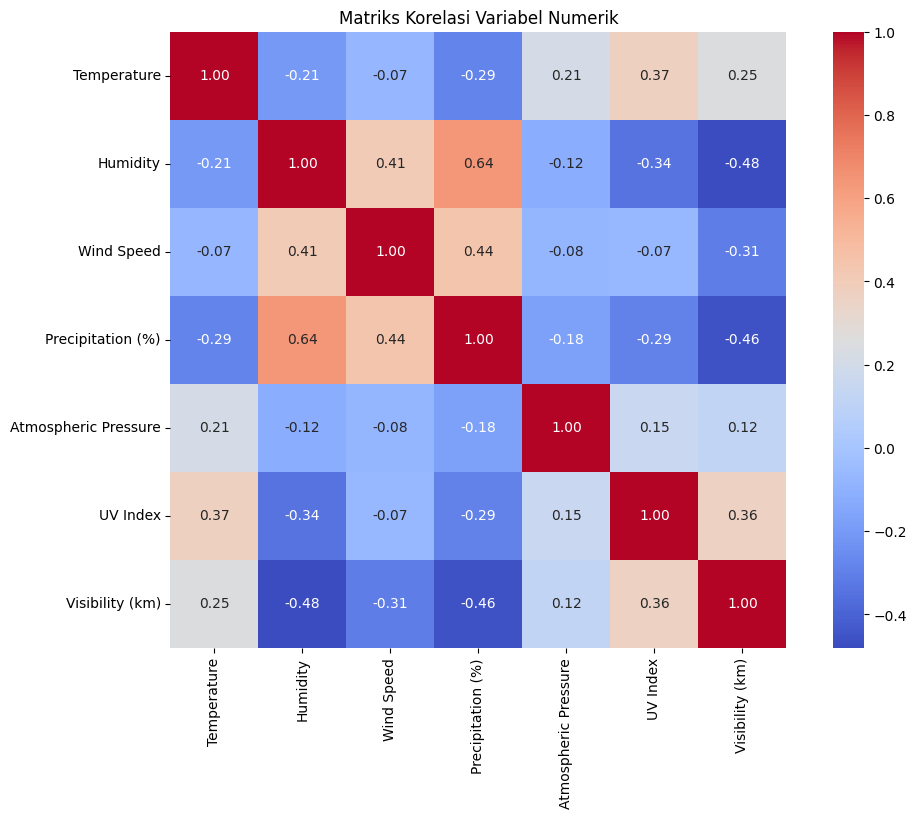

In [8]:
# Matriks korelasi
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

Selanjutnya perlu membuat scatter plot untuk melihat hubungan antar variabel

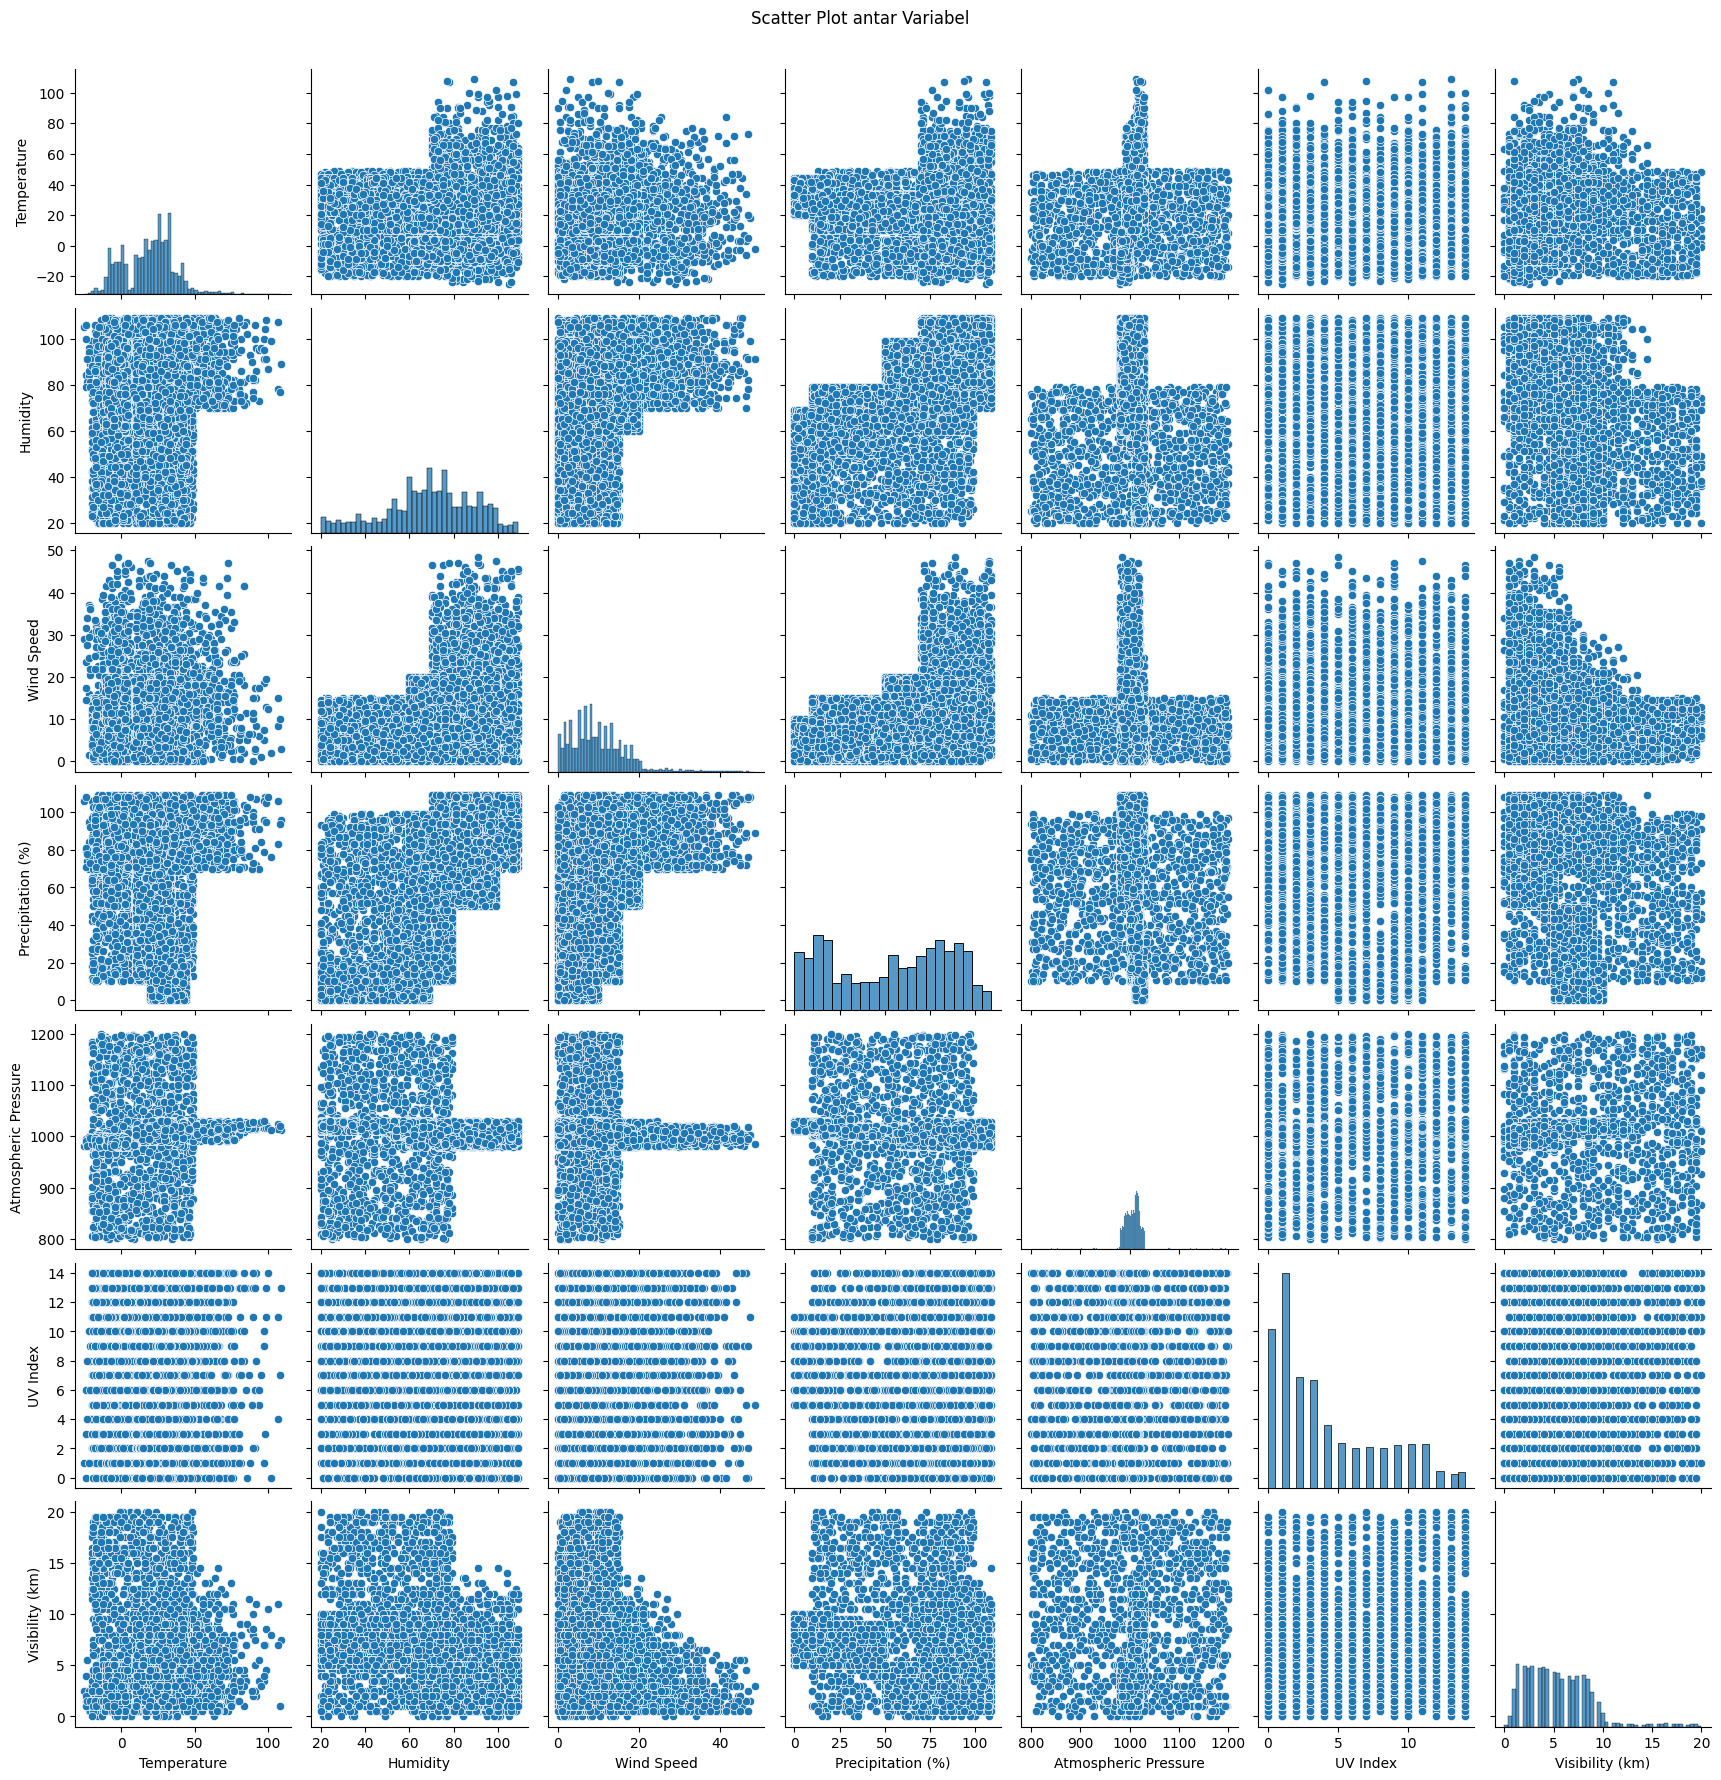

In [9]:
# Scatter plot matrix (pairplot)
sns.pairplot(df[numerical_cols])
plt.suptitle("Scatter Plot antar Variabel", y=1.02)
plt.show()

# **5. Data Preprocessing**

Selanjutnya perlu melakukan visualiasi pada setiap fitur

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Selanjutnya lakukan Normalisasi dan Standarisasi

In [10]:
#Standarisasi
from sklearn.preprocessing import StandardScaler

# 1. Pilih kolom numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 2. Inisialisasi StandardScaler
scaler = StandardScaler()

# 3. Fit dan transform
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Cek hasil standarisasi
print(df_scaled[numerical_cols].describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  1.320000e+04  1.320000e+04  1.320000e+04       1.320000e+04   
mean  -6.136505e-17  3.445056e-16  2.368476e-17       1.098112e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00       1.000038e+00   
min   -2.538158e+00 -2.412206e+00 -1.423215e+00      -1.679256e+00   
25%   -8.701176e-01 -5.799313e-01 -6.994626e-01      -1.084490e+00   
50%    1.076993e-01  6.384073e-02 -1.204609e-01       1.363456e-01   
75%    6.828857e-01  7.571337e-01  5.309161e-01       8.876291e-01   
max    5.169340e+00  1.995157e+00  5.597181e+00       1.732823e+00   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          1.320000e+04  1.320000e+04     1.320000e+04  
mean          -5.307539e-16  4.844610e-18     3.768030e-18  
std            1.000038e+00  1.000038e+00     1.000038e+00  
min           -5.530053e+00 -1.038715e+00    -1.620384e+00  
25%           -2.964633e-01 -7.794096e-01    -7.305386e-01  
50%

In [11]:
#Normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_normalized[numerical_cols].describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean       0.329310      0.547313      0.202726           0.492150   
std        0.129749      0.226902      0.142448           0.293088   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.216418      0.415730      0.103093           0.174312   
50%        0.343284      0.561798      0.185567           0.532110   
75%        0.417910      0.719101      0.278351           0.752294   
max        1.000000      1.000000      1.000000           1.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean               0.515442      0.286126         0.273146  
std                0.093211      0.275471         0.168575  
min                0.000000      0.000000         0.000000  
25%                0.487810      0.071429         0.150000  
50%

Selanjutnya, lakukan deteksi dan penanganan outlier

In [12]:
# Salin dataframe untuk deteksi outlier
df_outlier = df.copy()

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Looping untuk cek outlier
for col in numerical_cols:
    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_outlier[(df_outlier[col] < lower_bound) | (df_outlier[col] > upper_bound)]
    print(f"Outlier pada kolom {col}: {len(outliers)} data")

# Penanganan: drop outlier (opsional)
for col in numerical_cols:
    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df_outlier[(df_outlier[col] >= lower_bound) & (df_outlier[col] <= upper_bound)]

print("\nJumlah data setelah outlier dihapus:", df_outlier.shape[0])

Outlier pada kolom Temperature: 92 data
Outlier pada kolom Humidity: 0 data
Outlier pada kolom Wind Speed: 404 data
Outlier pada kolom Precipitation (%): 0 data
Outlier pada kolom Atmospheric Pressure: 927 data
Outlier pada kolom UV Index: 0 data
Outlier pada kolom Visibility (km): 383 data

Jumlah data setelah outlier dihapus: 11586


Lakukan encoding data kategorikal dengan K-Means

In [13]:
# Melakukan encoding data untuk data kategorikal
categorical_cols = ['Location', 'Season', 'Cloud Cover']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

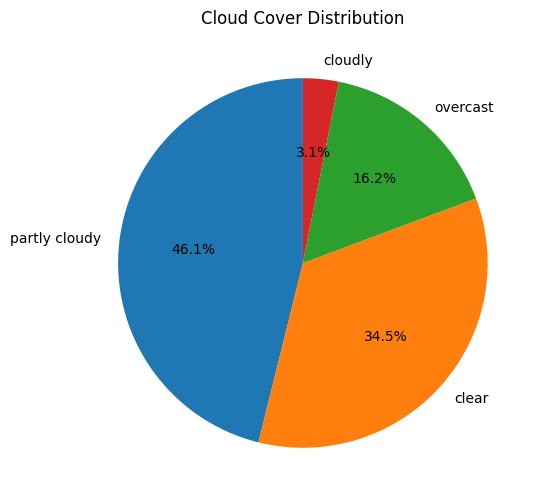

In [14]:
# Menghitung distribusi Cloud cover dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(6, 6))
plt.pie(df['Cloud Cover'].value_counts(),labels=['partly cloudy', 'clear', 'overcast', 'cloudly'], autopct='%1.1f%%', startangle=90)
plt.title('Cloud Cover Distribution')
plt.show()

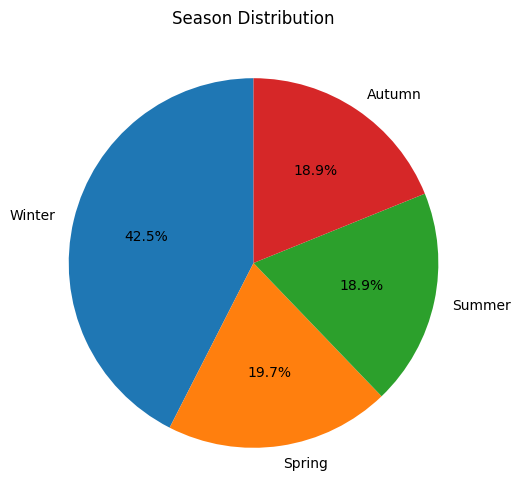

In [15]:
# Menghitung distribusi Cloud cover dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(6, 6))
plt.pie(df['Season'].value_counts(),labels=['Winter', 'Spring', 'Summer', 'Autumn'], autopct='%1.1f%%', startangle=90)
plt.title('Season Distribution')
plt.show()

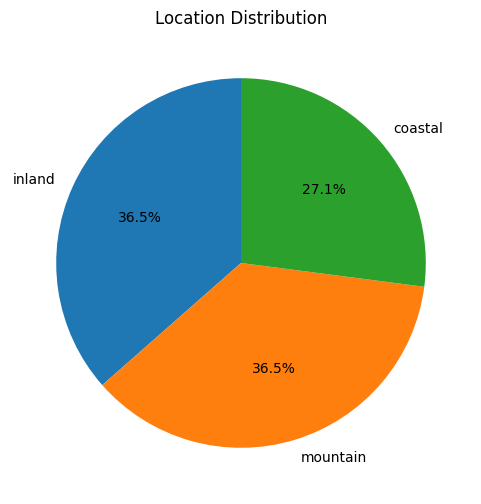

In [16]:
# Menghitung distribusi Cloud cover dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(6, 6))
plt.pie(df['Location'].value_counts(),labels=['inland', 'mountain', 'coastal'], autopct='%1.1f%%', startangle=90)
plt.title('Location Distribution')
plt.show()

Untuk menganalisis distribusi, perlu dibuat pengelompokkan (Binning) terhadap variabel numerik seperti Temperature, Humidity, Wind Speed	Precipitation (%)	Atmospheric Pressure	UV Index	Visibility (km)

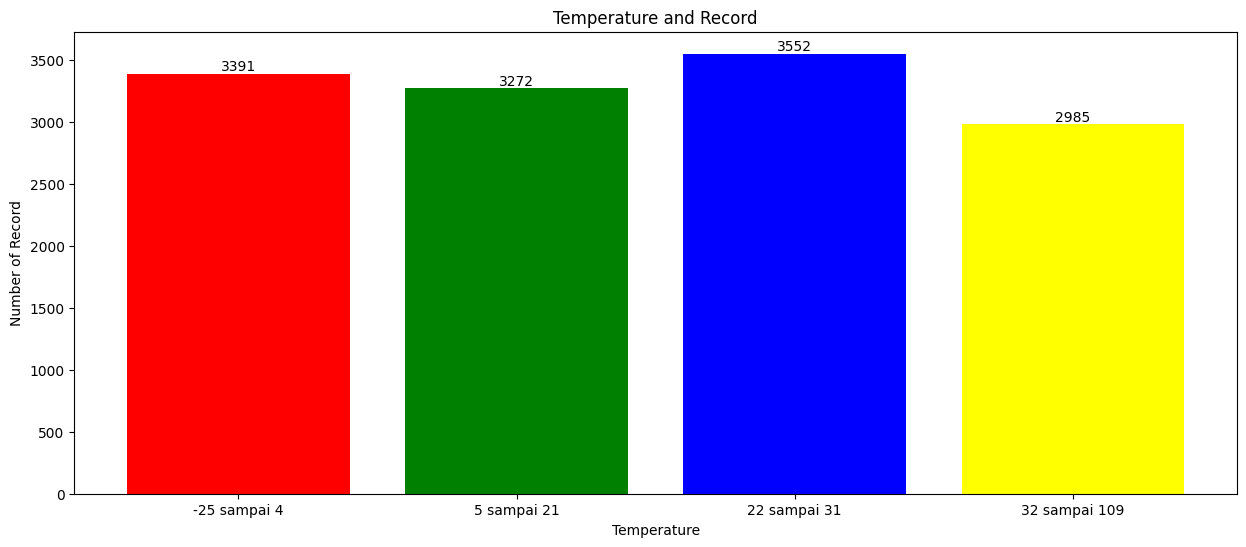

In [17]:
# Mengelompokkan temperature ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
Dingin = df.Temperature[(df.Temperature >= -25) & (df.Temperature <= 4)]
Sejuk = df.Temperature[(df.Temperature >= 5) & (df.Temperature <= 21)]
Hangat = df.Temperature[(df.Temperature >= 22) & (df.Temperature <= 31)]
Panas = df.Temperature[(df.Temperature >= 32) & (df.Temperature <= 109)]

# Menyusun data untuk plotting
x = ["-25 sampai 4", "5 sampai 21", "22 sampai 31", "32 sampai 109"]
y = [len(Dingin.values), len(Sejuk.values), len(Hangat.values), len(Panas.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Temperature and Record")
plt.xlabel("Temperature")
plt.ylabel("Number of Record")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

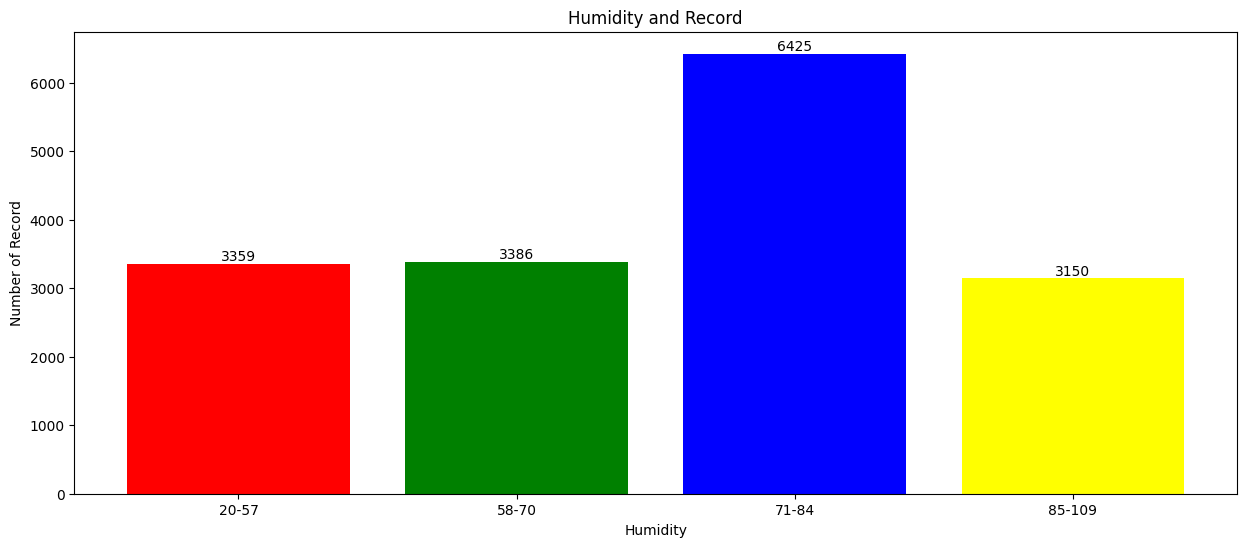

In [18]:
# Mengelompokkan humidity ke dalam kategori dan menghitung jumlah record di setiap kategori
Rendah = df.Humidity[(df.Humidity >= 20) & (df.Humidity <= 57)]
Sedang = df.Humidity[(df.Humidity >= 58) & (df.Humidity <= 70)]
Tinggi = df.Humidity[(df.Humidity >= 71) & (df.Temperature <= 84)]
Sangat_Tinggi = df.Humidity[(df.Humidity >= 85) & (df.Humidity <= 109)]

# Menyusun data untuk plotting
x = ["20-57", "58-70", "71-84", "85-109"]
y = [len(Rendah.values), len(Sedang.values), len(Tinggi.values), len(Sangat_Tinggi.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Humidity and Record")
plt.xlabel("Humidity")
plt.ylabel("Number of Record")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

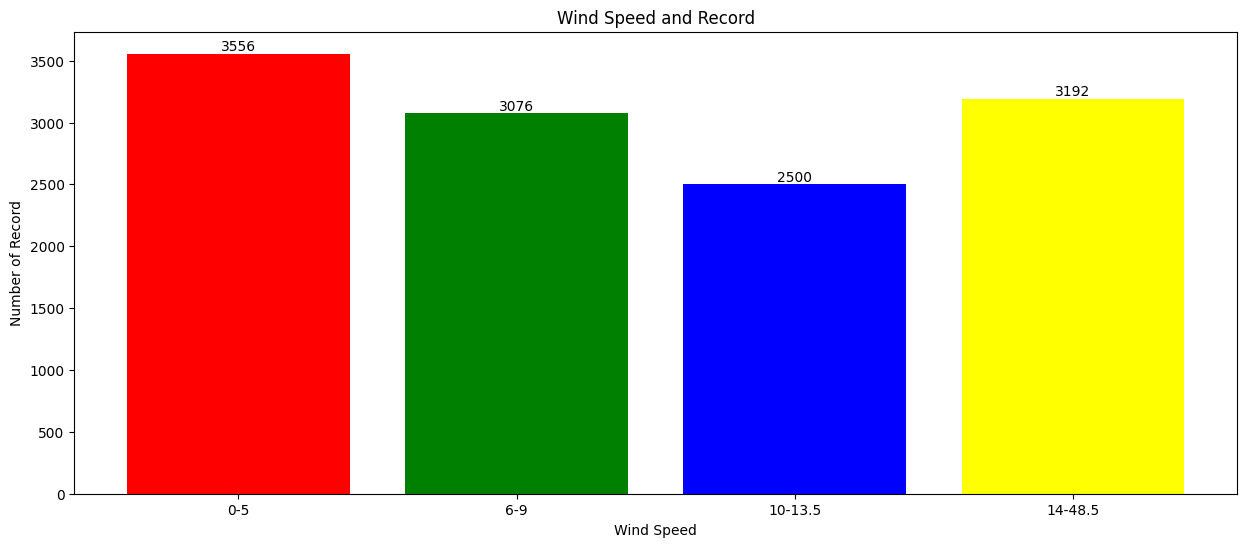

In [19]:
# Mengelompokkan wind speed ke dalam kategori dan menghitung jumlah record di setiap kategori
Pelan = df['Wind Speed'][(df['Wind Speed'] >= 0) & (df['Wind Speed'] <= 5)]
Sepoi = df['Wind Speed'][(df['Wind Speed'] >= 6) & (df['Wind Speed'] <= 9)]
Kenceng = df['Wind Speed'][(df['Wind Speed'] >= 10) & (df['Wind Speed'] <= 13.5)]
Sangat_Kenceng = df['Wind Speed'][(df['Wind Speed'] >= 14) & (df['Wind Speed'] <= 48.5)]

# Menyusun data untuk plotting
x = ["0-5", "6-9", "10-13.5", "14-48.5"]
y = [len(Pelan.values), len(Sepoi.values), len(Kenceng.values), len(Sangat_Kenceng.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Wind Speed and Record")
plt.xlabel("Wind Speed")
plt.ylabel("Number of Record")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
# Pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=[np.number]).columns
kategori_cols = df.select_dtypes(include=['object']).columns

# ===== 1. Standarisasi kolom numerik =====
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerik_cols] = scaler.fit_transform(df_scaled[numerik_cols])

# ===== 2. Label Encoding kolom kategorikal =====
le_dict = {}
for col in kategori_cols:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])
    le_dict[col] = le  # Simpan encoder jika ingin decode nanti

# ===== 3. Siapkan input untuk K-Prototypes =====
data_matrix = df_scaled.to_numpy()

# Tentukan index kolom kategorikal
cat_idx = [df_scaled.columns.get_loc(col) for col in categorical_cols]

# ===== 4. Fit K-Prototypes =====
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1, random_state=42)
clusters = kproto.fit_predict(data_matrix, categorical=cat_idx)
df_scaled['Cluster'] = clusters

# ===== 5. Tambahkan hasil clustering ke dataframe =====
df_scaled['Cluster'] = clusters

# Tampilkan hasil awal
print(df_scaled[['Cluster'] + list(df.columns)])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5904, ncost: 60949.75918462809
Run: 1, iteration: 2/100, moves: 1285, ncost: 60263.8521126874
Run: 1, iteration: 3/100, moves: 436, ncost: 60161.53325347258
Run: 1, iteration: 4/100, moves: 317, ncost: 60087.56717599517
Run: 1, iteration: 5/100, moves: 289, ncost: 60011.638730556006
Run: 1, iteration: 6/100, moves: 283, ncost: 59926.92841484646
Run: 1, iteration: 7/100, moves: 286, ncost: 59841.88724208064
Run: 1, iteration: 8/100, moves: 216, ncost: 59784.31786179612
Run: 1, iteration: 9/100, moves: 121, ncost: 59763.43698519178
Run: 1, iteration: 10/100, moves: 57, ncost: 59758.27198581889
Run: 1, iteration: 11/100, moves: 28, ncost: 59756.5415988725
Run: 1, iteration: 12/100, moves: 25, ncost: 59755.676521313486
Run: 1, iteration: 13/100, moves: 6, ncost: 59755.590661974
Run: 1, iteration: 14/100,

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Menggunakan Elbow Method

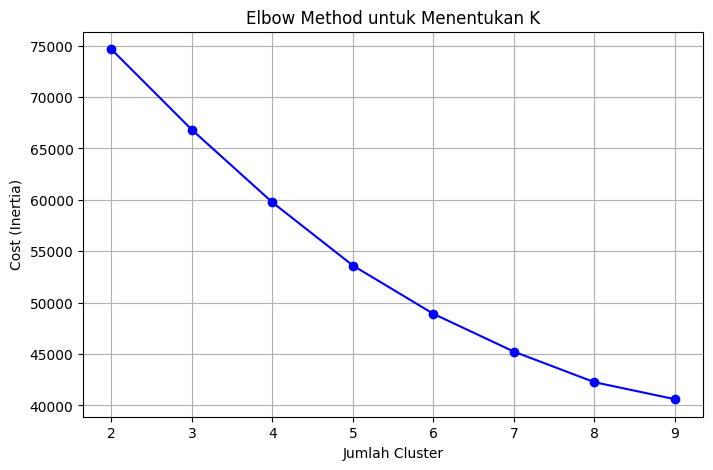

In [23]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

cost = []
K = range(2, 10)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0, random_state=42)
    kproto.fit_predict(data_matrix, categorical=cat_idx)
    cost.append(kproto.cost_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, cost, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method untuk Menentukan K')
plt.grid(True)
plt.show()

Menggunakan silhoette_score

Silhouette Score untuk k=2: 0.3173
Silhouette Score untuk k=3: 0.3049
Silhouette Score untuk k=4: 0.3270
Silhouette Score untuk k=5: 0.2605
Silhouette Score untuk k=6: 0.2731
Silhouette Score untuk k=7: 0.2525
Silhouette Score untuk k=8: 0.2600
Silhouette Score untuk k=9: 0.2467


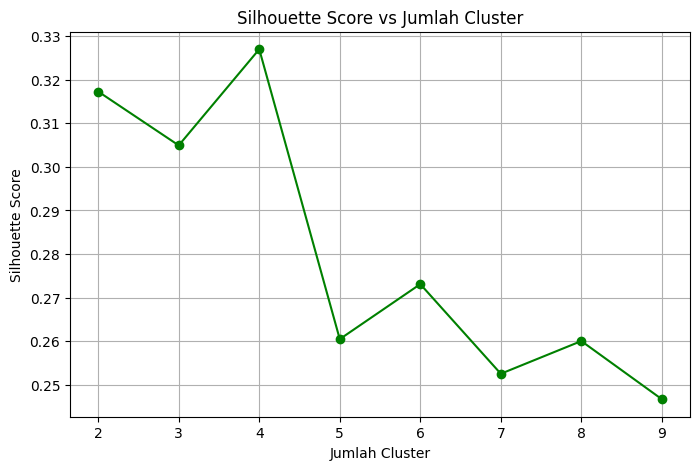

In [24]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 10)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0, random_state=42)
    labels = kproto.fit_predict(data_matrix, categorical=cat_idx)

    # Ambil hanya kolom numerik untuk silhouette (standarisasi sudah dilakukan sebelumnya)
    score = silhouette_score(df_scaled[numerical_cols], labels)
    sil_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.grid(True)
plt.show()

Bisa dilihat, jadi jumlah cluster yang diperlukan sebanyak 4 cluster

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

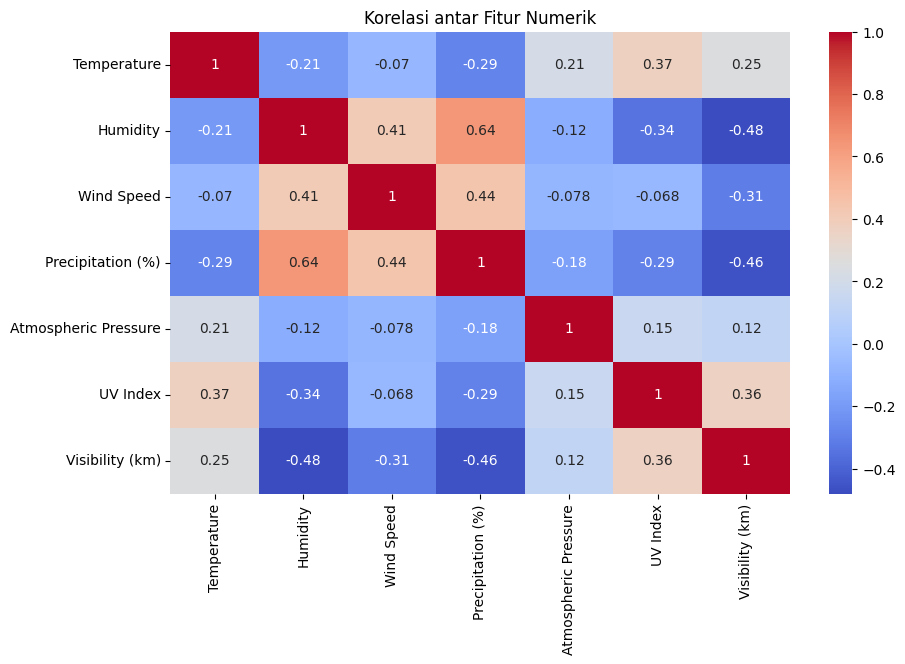

In [25]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

In [26]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True))

Location
inland      0.364848
mountain    0.364621
coastal     0.270530
Name: proportion, dtype: float64
Season
Winter    0.425000
Spring    0.196818
Autumn    0.189394
Summer    0.188788
Name: proportion, dtype: float64
Cloud Cover
overcast         0.461364
partly cloudy    0.345455
clear            0.162045
cloudy           0.031136
Name: proportion, dtype: float64


In [27]:
# 1. Pilih fitur
# Define selected_numerical with desired numerical columns from your DataFrame (df)
selected_numerical = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
selected_features = selected_numerical + list(categorical_cols)

# 2. Copy dan siapkan data
df_fs = df[selected_features].copy()

# 3. Encode kategorikal
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fs[col] = le.fit_transform(df_fs[col])
    le_dict[col] = le

# 4. Standarisasi numerik
scaler = StandardScaler()
df_fs[selected_numerical] = scaler.fit_transform(df_fs[selected_numerical])

# 5. K-Prototypes
cat_idx_fs = [df_fs.columns.get_loc(col) for col in categorical_cols]
data_matrix_fs = df_fs.to_numpy()

kproto_fs = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=0, random_state=42)
labels_fs = kproto_fs.fit_predict(data_matrix_fs, categorical=cat_idx_fs)

# 6. Evaluasi Silhouette Score
sil_fs = silhouette_score(df_fs[selected_numerical], labels_fs)
print(f"Silhouette Score SETELAH feature selection: {sil_fs:.4f}")

Silhouette Score SETELAH feature selection: 0.3049


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

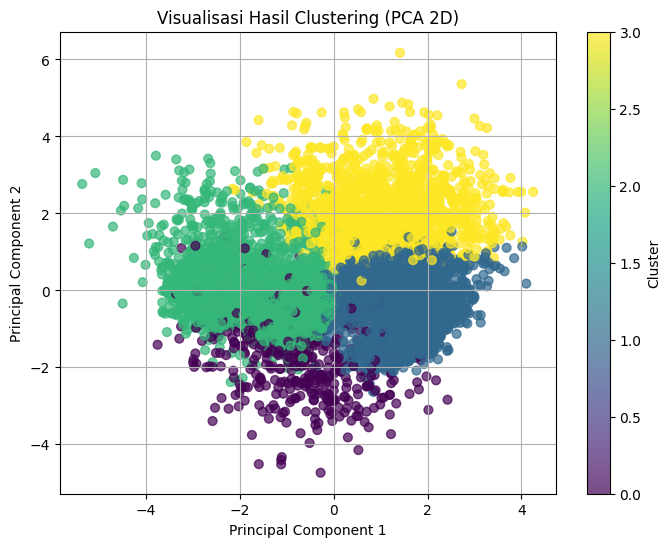

In [28]:
# Ambil hanya kolom numerik yang sudah di-scale
numerical_cols_scaled = df_scaled[numerical_cols]

# Jalankan PCA
pca = PCA(n_components=2)
components = pca.fit_transform(numerical_cols_scaled)

# Simpan hasil PCA ke dalam dataframe baru untuk plotting
df_plot = pd.DataFrame()
df_plot['PC1'] = components[:, 0]
df_plot['PC2'] = components[:, 1]
df_plot['Cluster'] = df_scaled['Cluster']  # Cluster hasil dari K-Prototypes

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_plot['PC1'], df_plot['PC2'], c=df_plot['Cluster'], cmap='viridis', s=40, alpha=0.7)
plt.title('Visualisasi Hasil Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [29]:
# Tambahkan Label Cluster ke Data yang Dinormalisasi
df_scaled['Cluster'] = clusters  # clusters adalah hasil dari kproto.fit_predict()

In [30]:
# Salin dataframe untuk inverse
df_interpreted = df_scaled.copy()

# Kembalikan fitur kategorikal ke bentuk aslinya
for col in categorical_cols:
    le = le_dict[col]  # ambil encoder yang sudah disimpan sebelumnya
    df_interpreted[col] = le.inverse_transform(df_interpreted[col])

In [31]:
# Inverse transform fitur numerik
df_interpreted[numerical_cols] = scaler.inverse_transform(df_interpreted[numerical_cols])

In [32]:
df_result = df_interpreted.copy()

In [33]:
# Statistik numerik per cluster
print(df_result.groupby('Cluster')[numerical_cols].mean())

# Distribusi fitur kategorikal per cluster
for col in categorical_cols:
    print(f"\nDistribusi {col} per Cluster:")
    print(df_result.groupby('Cluster')[col].value_counts(normalize=True))

         Temperature   Humidity  Wind Speed  Precipitation (%)  \
Cluster                                                          
0          12.715190  48.345992    7.644515          58.320675   
1           9.068182  79.873224   11.010210          74.406072   
2          26.180800  53.718222    6.302756          23.249956   
3          32.755616  89.895167   19.536419          88.921715   

         Atmospheric Pressure  UV Index  Visibility (km)  
Cluster                                                   
0                  883.382679  7.261603        10.981013  
1                  997.762779  1.205433         3.109464  
2                 1023.498044  5.548444         7.657778  
3                 1008.596576  7.784207         4.300885  

Distribusi Location per Cluster:
Cluster  Location
0        mountain    0.371308
         coastal     0.331224
         inland      0.297468
1        mountain    0.413885
         inland      0.402166
         coastal     0.183949
2        coastal 

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [34]:
# Inverse transform semua kolom numerik
df_scaled[numerical_cols] = scaler.inverse_transform(df_scaled[numerical_cols])

In [35]:
# Gabungkan hasil dengan cluster untuk interpretasi
df_scaled['Cluster'] = clusters

# Optional: buat dataframe final untuk ekspor atau analisis
df_final_result = df_scaled.copy()

# Lihat beberapa baris hasil akhirnya
print(df_final_result.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0      73.0         9.5               82.0            3   
1         39.0      96.0         8.5               71.0            3   
2         30.0      64.0         7.0               16.0            0   
3         38.0      83.0         1.5               82.0            0   
4         27.0      74.0        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  Cluster  
0               1010.82       2.0       3              3.5         1        1  
1               1011.43       7.0       1             10.0         1        3  
2               1018.72       5.0       1              5.5         2        2  
3               1026.25       7.0       1              1.0         0        1  
4                990.67       1.0       3              2.5         2        1  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [36]:
# Group by Cluster dan hitung rata-rata fitur numerik
cluster_summary = df_result.groupby('Cluster')[numerical_cols].mean().round(2)
print(" Rata-rata Fitur Numerik per Cluster:\n")
print(cluster_summary)


 Rata-rata Fitur Numerik per Cluster:

         Temperature  Humidity  Wind Speed  Precipitation (%)  \
Cluster                                                         
0              12.72     48.35        7.64              58.32   
1               9.07     79.87       11.01              74.41   
2              26.18     53.72        6.30              23.25   
3              32.76     89.90       19.54              88.92   

         Atmospheric Pressure  UV Index  Visibility (km)  
Cluster                                                   
0                      883.38      7.26            10.98  
1                      997.76      1.21             3.11  
2                     1023.50      5.55             7.66  
3                     1008.60      7.78             4.30  


In [38]:
# Cek proporsi kategori dalam setiap cluster
for col in categorical_cols:
    print(f"\n Distribusi kategori '{col}' per Cluster:")
    print(df_result.groupby('Cluster')[col].value_counts(normalize=True).round(2))


 Distribusi kategori 'Location' per Cluster:
Cluster  Location
0        mountain    0.37
         coastal     0.33
         inland      0.30
1        mountain    0.41
         inland      0.40
         coastal     0.18
2        coastal     0.35
         mountain    0.33
         inland      0.33
3        inland      0.39
         mountain    0.32
         coastal     0.29
Name: proportion, dtype: float64

 Distribusi kategori 'Season' per Cluster:
Cluster  Season
0        Spring    0.27
         Winter    0.25
         Summer    0.24
         Autumn    0.24
1        Winter    0.63
         Summer    0.13
         Spring    0.12
         Autumn    0.12
2        Spring    0.26
         Winter    0.25
         Autumn    0.25
         Summer    0.24
3        Winter    0.36
         Autumn    0.22
         Summer    0.22
         Spring    0.20
Name: proportion, dtype: float64

 Distribusi kategori 'Cloud Cover' per Cluster:
Cluster  Cloud Cover  
0        cloudy           0.35
         ov

<ipython-input-39-03e28f6b4156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_result, x='Cluster', y=col, palette='Set3')
<ipython-input-39-03e28f6b4156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_result, x='Cluster', y=col, palette='Set3')
<ipython-input-39-03e28f6b4156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_result, x='Cluster', y=col, palette='Set3')
<ipython-input-39-03e28f6b4156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

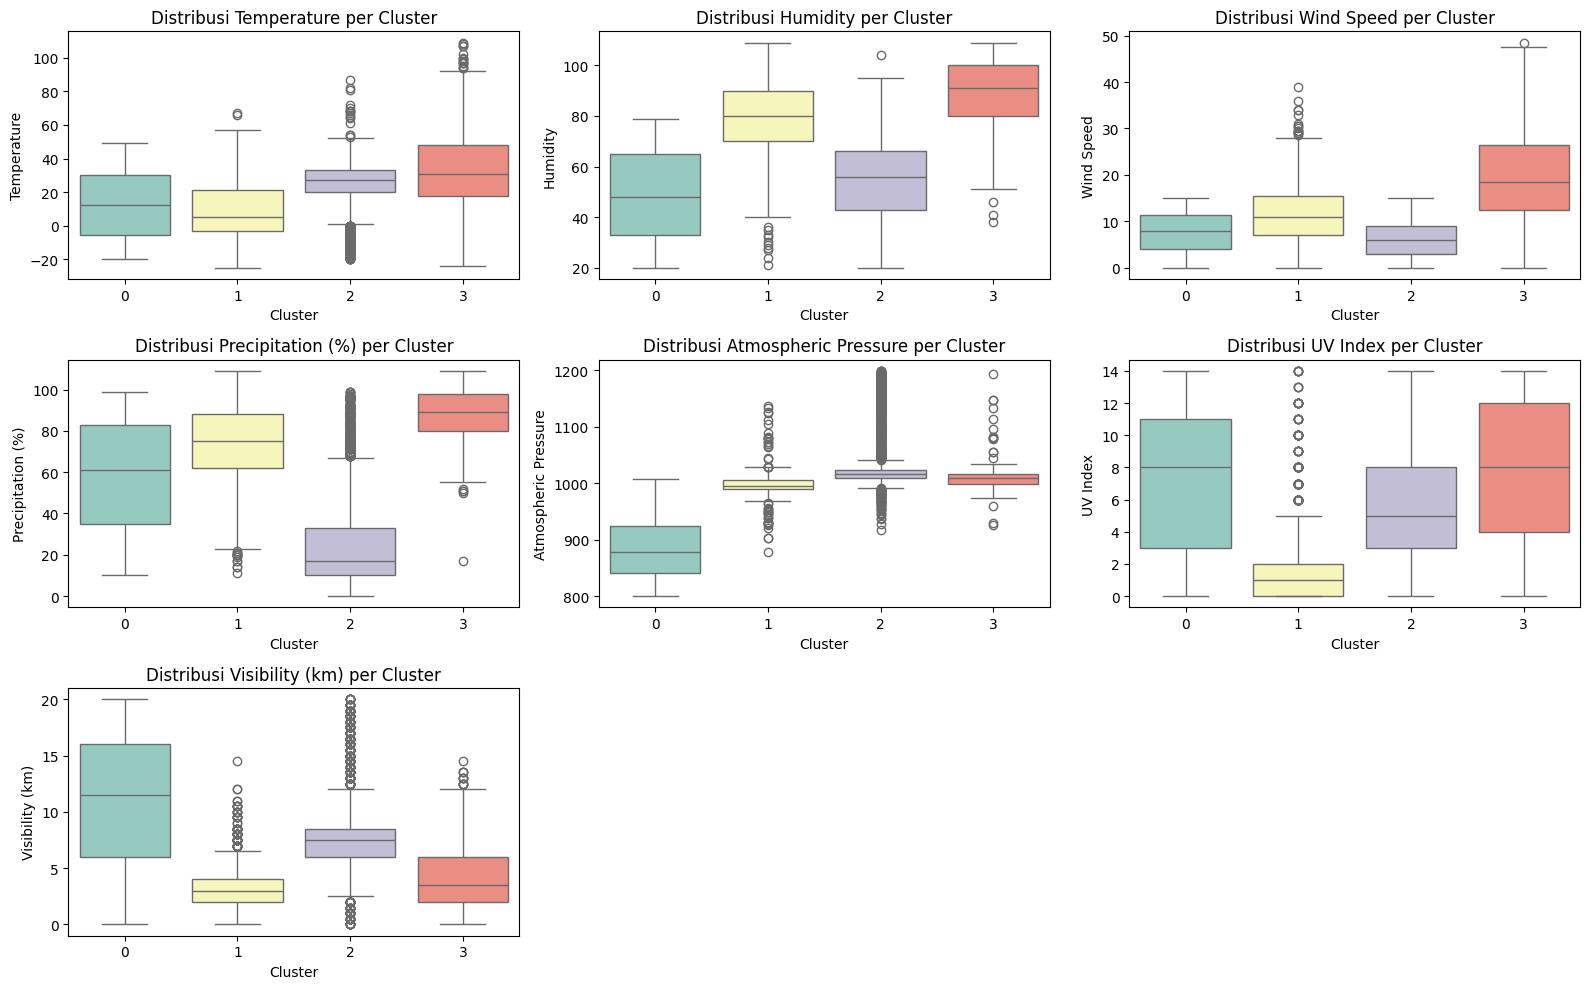

In [39]:
# Boxplot untuk fitur numerik
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols)+2)//3, 3, i)
    sns.boxplot(data=df_result, x='Cluster', y=col, palette='Set3')
    plt.title(f'Distribusi {col} per Cluster')
plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
1. **Cluster 0** **— Cuaca Campuran, Lokasi Gunung dan Pesisir**

Lokasi
*   Mountain (37%) dan Coastal (33%) mendominasi → lebih ke area elevasi dan pantai

Season
*   Distribusi hampir merata (Spring, Winter, Summer, Autumn masing-masing ~25%)

Cloud Cover
*   Campuran: Cloudy (35%), Overcast (33%), dan Partly Cloudy (32%)

Interprtasi
*   Cluster ini mewakili cuaca transisional, dengan distribusi awan yang bervariasi

* Terjadi di berbagai musim dan lokasi pegunungan/pantai


2. **Cluster 1** **— Cuaca Ekstrem Musim Dingin**

Lokasi:
*  Mountain (41%) dan Inland (40%)

Season:
* Sangat dominan Winter (63%)Sangat dominan Winter (63%)

Cloud Cover:
* Overcast (73%) → langit sangat tertutup awan
* Hampir tidak ada clear / cloudy

Lokasi & Musim:
Mayoritas inland (39%) dan winter (35%)
Kondisi ini bisa muncul di cuaca badai tropis, hujan besar

Interpretasi:
* Cluster ini menunjukkan kondisi musim dingin ekstrem dengan awan tebal
* Cocok untuk area pegunungan dan pedalaman

3. **Cluster 2** **— Cuaca Cerah dan Stabil**

Lokasi:
* Merata: Coastal (35%), Mountain (33%), Inland (33%)

Season:
* Hampir rata di semua musim (~25%)

Cloud Cover:
* Dominan Partly Cloudy (43%) dan Clear (32%)

Interpretasi:
* Cluster ini menunjukkan cuaca relatif stabil dan cerah
* Lokasi dan musim bervariasi → mewakili cuaca normal/ideal

4. **Cluster 3 - Cuaca Dingin & Berawan Musim Gugur**

Lokasi:
* Didominasi oleh Inland (39%) dan Mountain (32%)

Season:
* Winter (36%), diikuti Autumn dan Summer (22%)

Cloud Cover:
* Overcast (45%) dan Partly Cloudy (35%)

Interpretasi:
* Mewakili cuaca dingin dan tertutup awan di area dataran tinggi atau pedalaman
* Terjadi banyak di musim gugur & musim dingin



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df_final_result.to_csv('df_final_result.csv', index=False)